In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

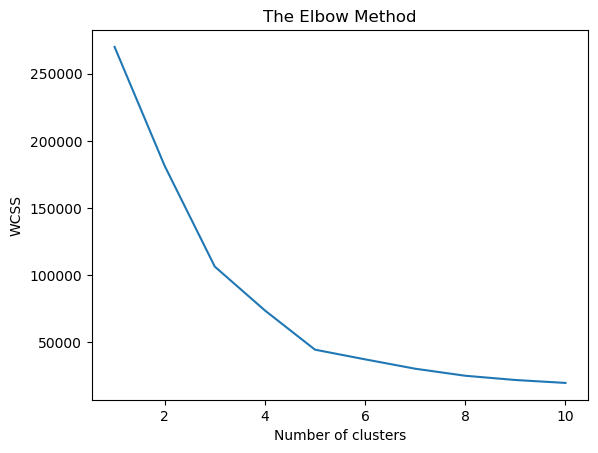

In [4]:
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    #for model creation
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
#range=no.of clusters,list1
plt.plot(range(1,11),list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [6]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [7]:
#To add a extra column for cluster group
supervised=pd.DataFrame(dataset)

In [8]:
supervised['Cluster_group']=y_kmeans

In [9]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [10]:
supervised.to_csv("cluster.csv",index=False)

In [11]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [12]:
centroids=kmeans.cluster_centers_

In [13]:
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [14]:
supervised.columns[3]

'Annual Income (k$)'

In [15]:
supervised.columns[4]

'Spending Score (1-100)'

In [16]:
!pip list

Package              Version
-------------------- -----------
anyio                3.5.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
attrs                22.1.0
Babel                2.11.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
brotlipy             0.7.0
certifi              2022.12.7
cffi                 1.15.1
charset-normalizer   2.0.4
colorama             0.4.6
cryptography         38.0.4
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
fastjsonschema       2.16.2
flit_core            3.6.0
idna                 3.4
importlib-metadata   4.11.3
importlib-resources  5.2.0
ipykernel            6.15.2
ipython              7.31.1
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.1
Jinja2               3.1.2
joblib               1.2.0
json5                0.9.6
jsonschema           4.17.3
jupyter              1.0.0
jupyte

C:\Users\axisi\Anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


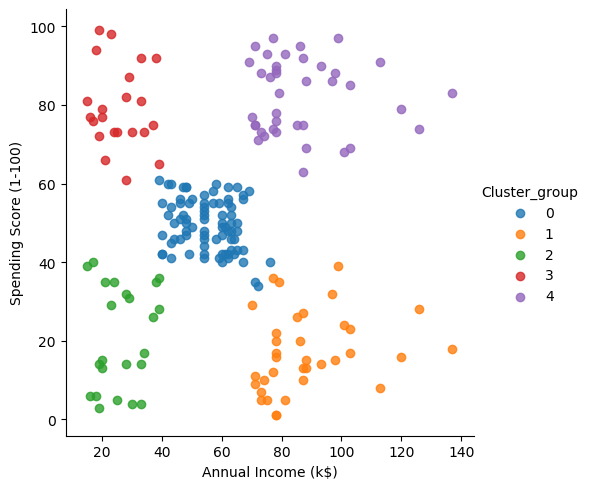

In [17]:
#seaborn for graphical use
import seaborn as sns
#sns.lmplot for graph,x axis is annual income ,y  axis is spending score ,hue is clustered column,fit_reg for fit_regression,legend for
#cluster colors and legend_out for cluster group name
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)